# KG Generator Tool

## Let's get started by importing relevant libraries

In [ ]:
#pip install -r requirements.txt

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.auto import tqdm

import pybel
from pybel.io.jupyter import to_jupyter
from utils import *
from kg_gen_2 import *

from IPython.display import Markdown, display

## Please execute following cells

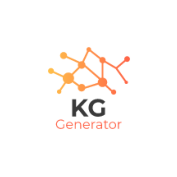

<span style='color:blue'>**Welcome to the KG Generator tool. In the following steps, we will need some inputs from your side.**</span>

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: aging


index,id,name
0,GO_0007568,aging
1,EFO_0005422,skin aging
2,MONDO_0019303,premature aging syndrome
3,EFO_0008006,skin aging measurement
4,Orphanet_276432,Premature aging appearance-developmental delay-cardiac arrhythmia syndrome
5,EFO_0005678,hippocampal sclerosis of aging
6,MONDO_0011150,acroosteolysis-keloid-like lesions-premature aging syndrome
7,HP_0004370,Abnormality of temperature regulation
8,MONDO_0020592,disorder of pharynx
9,MONDO_0004821,nasopharyngeal disorder


<span style='color:None'>**Here you go! Hopefully your disease of interest is in the list. If so, let's get started.**</span>

Please enter the index value of your disease of interest. Input: 0


Please enter the clinical trial phase of chemicals which should be identified by the workflow. Use a number between 1 (early phase) and 4 (FDA approved). For example, if you use 3, the KG will fetch chemicals that are in phase 3. Also, remember that lower the input value, higher will be the number of identified chemicals and therefore the running time of workflow also increases.


Your desired clinical trial phase: 4


Please provide a name for you KG. Input: aging


We have identified 3546 proteins (Swiss-Prot) associated with the disease. Following is a histogram that shows distribution of proteins based on scores provided by OpenTargets. The scores are influenced by various factors such as genetic associations, expression, mutations, known pathways, targeting drugs and so on.

Displaying top 20 genes


Protein,ENSG,UniProt,Source,Score
SNAP25,ENSG00000132639,P60880,uniprot_swissprot,0.671882
NDUFB9,ENSG00000147684,Q9Y6M9,uniprot_swissprot,0.630410
NDUFB7,ENSG00000099795,P17568,uniprot_swissprot,0.627524
NDUFA8,ENSG00000119421,P51970,uniprot_swissprot,0.619865
NDUFA11,ENSG00000174886,Q86Y39,uniprot_swissprot,0.619865
NDUFB4,ENSG00000065518,O95168,uniprot_swissprot,0.619388
NDUFS6,ENSG00000145494,O75380,uniprot_swissprot,0.616024
NDUFA9,ENSG00000139180,Q16795,uniprot_swissprot,0.614039
NDUFS5,ENSG00000168653,O43920,uniprot_swissprot,0.607207
NDUFB6,ENSG00000165264,O95139,uniprot_swissprot,0.606983


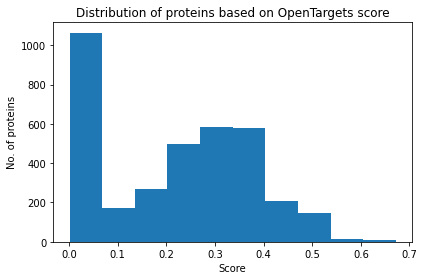



We recommend taking a threshold above 0.3 to exclude loosely associated proteins. 
Please enter your desired threshold: 0.6


Alright, we are good to go now. Your KG is now being generated! Sit back and relax!!

 Total no. of proteins:  11

     Protein             ENSG UniProt             Source     Score
0    SNAP25  ENSG00000132639  P60880  uniprot_swissprot  0.671882
1    NDUFB9  ENSG00000147684  Q9Y6M9  uniprot_swissprot  0.630410
2    NDUFB7  ENSG00000099795  P17568  uniprot_swissprot  0.627524
3    NDUFA8  ENSG00000119421  P51970  uniprot_swissprot  0.619865
4   NDUFA11  ENSG00000174886  Q86Y39  uniprot_swissprot  0.619865
5    NDUFB4  ENSG00000065518  O95168  uniprot_swissprot  0.619388
6    NDUFS6  ENSG00000145494  O75380  uniprot_swissprot  0.616024
7    NDUFA9  ENSG00000139180  Q16795  uniprot_swissprot  0.614039
8    NDUFS5  ENSG00000168653  O43920  uniprot_swissprot  0.607207
9    NDUFB6  ENSG00000165264  O95139  uniprot_swissprot  0.606983
10  NDUFAF1  ENSG00000137806  

Fetching Protein-related info:   0%|          | 0/11 [00:00<?, ?it/s]

A total of 7 drugs have been identified. Now fetching relevant data


Retrieving mechanisms from ChEMBL:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving bioassays from ChEMBL:   0%|          | 0/7 [00:00<?, ?it/s]

Filtering UniProt proteins from ChEMBL:   0%|          | 0/4 [00:00<?, ?it/s]

Filtering human proteins from ChEMBL:   0%|          | 0/4 [00:00<?, ?it/s]

Populating ChEMBL data for human proteins:   0%|          | 0/4 [00:00<?, ?it/s]

Populating Uniprot edges:   0%|          | 0/11 [00:00<?, ?it/s]

Populating Chemical-MoA edges:   0%|          | 0/5 [00:00<?, ?it/s]

Adding bioassay edges to BEL:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving Adverse Effects for each drug:   0%|          | 0/7 [00:00<?, ?it/s]

Your KG is now generated! 

Now let's save all the files that were created in the process. 

Please enter the location (e.g. 'C:\Users\rkarki\Documents\kg\' ) where KG files should be stored. A folder will be created automatically. 

Input: C:\Users\reagon.karki\Documents\GitHub\kgg\data\kgs\test\


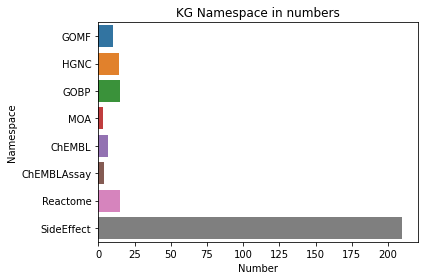

In [2]:
kg = createKG()

In [3]:
kg.summarize

Name,aging
Version,0.0.1
Nodes,278
Namespaces,8
Edges,742
Annotations,0
Citations,3
Authors,0
Components,2
Warnings,0
Network Density,0.00964


In [4]:
to_jupyter(kg)

<IPython.core.display.Javascript object>

In [ ]:
KG_namespace_plot(kg)

In [ ]:
#For this example we are going to use the python default http library
import requests

#Build a dict with the following format, change the value of the two keys your DisGeNET account credentials, if you don't have an account you can create one here https://www.disgenet.org/signup/ 
auth_params = {"email":"change@this.email","password":"changethis"}

api_host = "https://www.disgenet.org/api"

api_key = None
s = requests.Session()
try:
    r = s.post(api_host+'/auth/', data=auth_params)
    if(r.status_code == 200):
        #Lets store the api key in a new variable and use it again in new requests
        json_response = r.json()
        api_key = json_response.get("token")
        print(api_key + "This is your user API key.") #Comment this line if you don't want your API key to show up in the terminal
    else:
        print(r.status_code)
        print(r.text)
except requests.exceptions.RequestException as req_ex:
    print(req_ex)
    print("Something went wrong with the request.")

if api_key:
    #Add the api key to the requests headers of the requests Session object in order to use the restricted endpoints.
    s.headers.update({"Authorization": "Bearer %s" % api_key}) 
    #Lets get all the diseases associated to a gene eg. APP (EntrezID 351) and restricted by a source.
    gda_response = s.get(api_host+'/gda/gene/351', params={'source':'UNIPROT'})
    print(gda_response.json())

if s:
    s.close()

In [ ]:
#For this example we are going to use the python default http library
import requests

#Build a dict with the following format, change the value of the two keys your DisGeNET account credentials, if you don't have an account you can create one here https://www.disgenet.org/signup/ 
auth_params = {"email":"reagonkarki@gmail.com","password":"Bhunti.87"}

api_host = "https://www.disgenet.org/api"

api_key = 'e25cb13382cb9b016247822c49f325f75991e607'
s = requests.Session()
try:
    r = s.post(api_host+'/auth/', data=auth_params)
    if(r.status_code == 200):
        #Lets store the api key in a new variable and use it again in new requests
        json_response = r.json()
        api_key = json_response.get("token")
        print(api_key + "This is your user API key.") #Comment this line if you don't want your API key to show up in the terminal
    else:
        print(r.status_code)
        print(r.text)
except requests.exceptions.RequestException as req_ex:
    print(req_ex)
    print("Something went wrong with the request.")

if api_key:
    #Add the api key to the requests headers of the requests Session object in order to use the restricted endpoints.
    s.headers.update({"Authorization": "Bearer %s" % api_key}) 
    #Lets get all the diseases associated to a gene eg. APP (EntrezID 351) and restricted by a source.
    
    #https://www.disgenet.org/api/vda/disease/D000544
        
    gda_response = s.get(api_host+'/vda/disease/mondo/0004975?type=disease&format=json')
    #gda_response = s.get(api_host+'/gda/gene/351', params={'source':'UNIPROT'})
    print(gda_response.json())

if s:
    s.close()

In [ ]:
def GetDiseaseSNPs(disease_id): 
    
    import requests
    
    doid = disease_id.split("_")
    print(doid)
    
    #For this example we are going to use the python default http library
    

    #Build a dict with the following format, change the value of the two keys your DisGeNET account credentials, if you don't have an account you can create one here https://www.disgenet.org/signup/ 
    auth_params = {"email":"reagonkarki@gmail.com","password":"Bhunti.87"}

    api_host = "https://www.disgenet.org/api"

    api_key = 'e25cb13382cb9b016247822c49f325f75991e607'
    s = requests.Session()

    if api_key:
        #Add the api key to the requests headers of the requests Session object in order to use the restricted endpoints.
        s.headers.update({"Authorization": "Bearer %s" % api_key}) 
        #Lets get all the diseases associated to a gene eg. APP (EntrezID 351) and restricted by a source.

        #https://www.disgenet.org/api/vda/disease/D000544
    
        gda_response = s.get(api_host+'/vda/disease/'+str(doid[0]).lower()+ "/" +str(doid[1]) +'?format=json')
        #gda_response = s.get(api_host+'/gda/gene/351', params={'source':'UNIPROT'})

        
        gda_response = gda_response.json()
        gda_response = pd.DataFrame(gda_response)
        return(gda_response)

    if s:
        s.close()

In [ ]:
test = GetDiseaseSNPs('MONDO_0004975')

In [ ]:
test = GetDiseaseSNPs('EFO_0000765')

In [ ]:
test

In [ ]:
x ='OR5V1;OR12D3'
#x = 'OR5V1'
x = x.split(';')
len(x)

In [ ]:
def snp2gene_rel(snp_df,graph): 
    
    #convert col to datatype == str to remove rows that have 'None' in gene_symbol
    snp_df[['gene_symbol']] =  snp_df[['gene_symbol']].astype(str)
    snp_df = snp_df.loc[snp_df['gene_symbol'] != "None"]
    snp_df = snp_df.reset_index(drop=True)
    
    print(len(snp_df))
    
    for i in tqdm(range(len(snp_df)),desc='adding SNPs'):
        genes = snp_df['gene_symbol'][i].split(';')
        
        for j in range(len(genes)):
        
            graph.add_association(
                Gene(namespace="dbSNP",name=snp_df['variantid'][i]),
                Protein(namespace = "HGNC", name = genes[j]),
                citation = "DisGeNet",
                evidence = "SNPs for queried disease"
            )
    
    return(graph)

In [ ]:
from pybel.dsl import Gene
kg = pybel.BELGraph(name='test', version="0.0.1")

In [ ]:
kg = snp2gene_rel(test,kg)

In [ ]:
kg = dbSNP_annotation(kg)

In [ ]:
kg.summarize

In [ ]:
to_jupyter(kg)

In [ ]:
#list entities of interest separated by a space
entityList = 'rs763059810 rs2395029 rs2284178'.split(' ')

#prtn_attr = nx.get_node_attributes(kg,'UniProt')
chem_attr = nx.get_node_attributes(kg,'source')
#bionote_attr = nx.get_node_attributes(mpox_graph,'3Dbio')

for node in kg.nodes():
    unique_node = []
    
    if node.name in entityList:
        if node not in unique_node:
            
            unique_node.append(node)
            print(node.name)
       
            if isinstance(node,pybel.dsl.Gene):
                print(chem_attr[node])
                
#             if isinstance(node,pybel.dsl.Protein):
#                 print(prtn_attr[node])
                
#             if isinstance(node,pybel.dsl.Protein):
#                 print(bionote_attr[node])
            

In [ ]:
chem_attr

In [ ]:
a = 'test'

In [ ]:
a+'.bel'

In [ ]:
def GetDiseaseSNPs(disease_id): 
    
    import requests
    
    doid = disease_id.split("_")
    #print(doid)
    
    #For this example we are going to use the python default http library
    

    #Build a dict with the following format, change the value of the two keys your DisGeNET account credentials, if you don't have an account you can create one here https://www.disgenet.org/signup/ 
    auth_params = {"email":"reagonkarki@gmail.com","password":"Bhunti.87"}

    api_host = "https://www.disgenet.org/api"

    api_key = 'e25cb13382cb9b016247822c49f325f75991e607'
    s = requests.Session()

    if api_key:
        #Add the api key to the requests headers of the requests Session object in order to use the restricted endpoints.
        s.headers.update({"Authorization": "Bearer %s" % api_key}) 
        #Lets get all the diseases associated to a gene eg. APP (EntrezID 351) and restricted by a source.

        #https://www.disgenet.org/api/vda/disease/D000544
    
        gda_response = s.get(api_host+'/vda/disease/'+str(doid[0]).lower()+ "/" +str(doid[1]) +'?format=json')
        #gda_response = s.get(api_host+'/gda/gene/351', params={'source':'UNIPROT'})

        if gda_response:
        
            gda_response = gda_response.json()
            gda_response = pd.DataFrame(gda_response)
            return(gda_response)

    if s:
        s.close()

In [ ]:
x = GetDiseaseSNPs('GO_0007568')

In [ ]:
x

In [ ]:
if not 'errors' in x.columns:
    print('do something')